#  Time Series Forecasting Project

## Problem Statement

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

## Importing Libraries

In [286]:
# Loading packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

## 1.1  Read the data

In [288]:
# read data
df = pd.read_csv("Rose.csv",parse_dates=True,index_col=0)
df = pd.DataFrame(df)

In [289]:
# top rows
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [290]:
# last  rows
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [291]:
# number of rows and columns
df.shape

(187, 1)

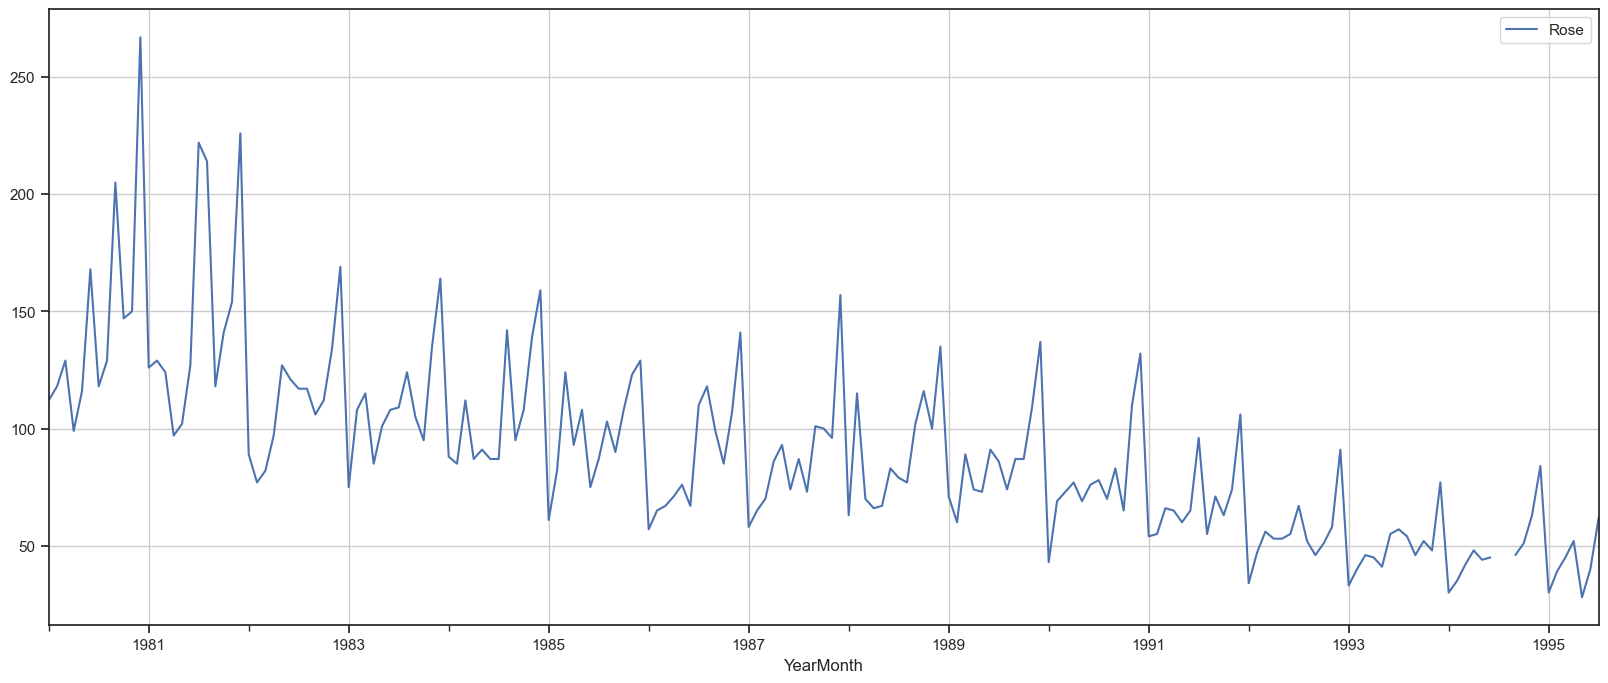

In [292]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [293]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [294]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [295]:
df.tail()

,Sales,Year,Month
YearMonth,,,
1995-03-01,45.0,1995,3
1995-04-01,52.0,1995,4
1995-05-01,28.0,1995,5
1995-06-01,40.0,1995,6
1995-07-01,62.0,1995,7


In [296]:
# number of rows and columns
df.shape

(187, 3)

## 1.2 Exploratory Data Analysis to understand the data and also perform decomposition.

In [298]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [299]:
# statistical summary
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Sales,185.0,90.0,39.0,28.0,63.0,86.0,112.0,267.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


In [300]:
# isnull
df.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

Missing value treatement

In [302]:
df[df['Sales'].isna()]

,Sales,Year,Month
YearMonth,,,
1994-07-01,NaN,1994,7
1994-08-01,NaN,1994,8


In [303]:
df['Sales_Before_After_Mean']=df['Sales']

In [304]:
np.mean(df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [305]:
df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df[df['Sales_Before_After_Mean'].isna()]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,


In [306]:
df.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1994-07-01,NaN,1994,7,59.5
1994-08-01,NaN,1994,8,54.0


In [307]:
df[df.Month==7]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1980-07-01,118.0,1980,7,118.0
1981-07-01,222.0,1981,7,222.0
1982-07-01,117.0,1982,7,117.0
1983-07-01,109.0,1983,7,109.0
1984-07-01,87.0,1984,7,87.0
1985-07-01,87.0,1985,7,87.0
1986-07-01,110.0,1986,7,110.0
1987-07-01,87.0,1987,7,87.0
1988-07-01,79.0,1988,7,79.0


In [308]:
df[df.Month==8]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1980-08-01,129.0,1980,8,129.0
1981-08-01,214.0,1981,8,214.0
1982-08-01,117.0,1982,8,117.0
1983-08-01,124.0,1983,8,124.0
1984-08-01,142.0,1984,8,142.0
1985-08-01,103.0,1985,8,103.0
1986-08-01,118.0,1986,8,118.0
1987-08-01,73.0,1987,8,73.0
1988-08-01,77.0,1988,8,77.0


In [309]:
df.drop(['Sales'],inplace=True,axis=1)

df.head()

,Year,Month,Sales_Before_After_Mean
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [310]:
# fill missing values in sales with the mean
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

In [311]:
# fill missing values in sales with the mean
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

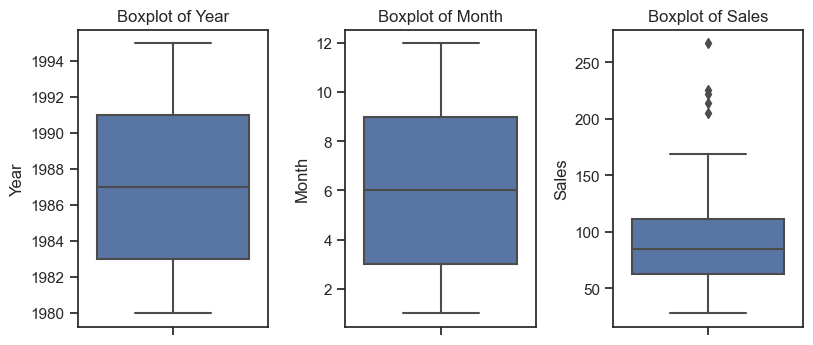

In [312]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sales

<Axes: xlabel='YearMonth'>

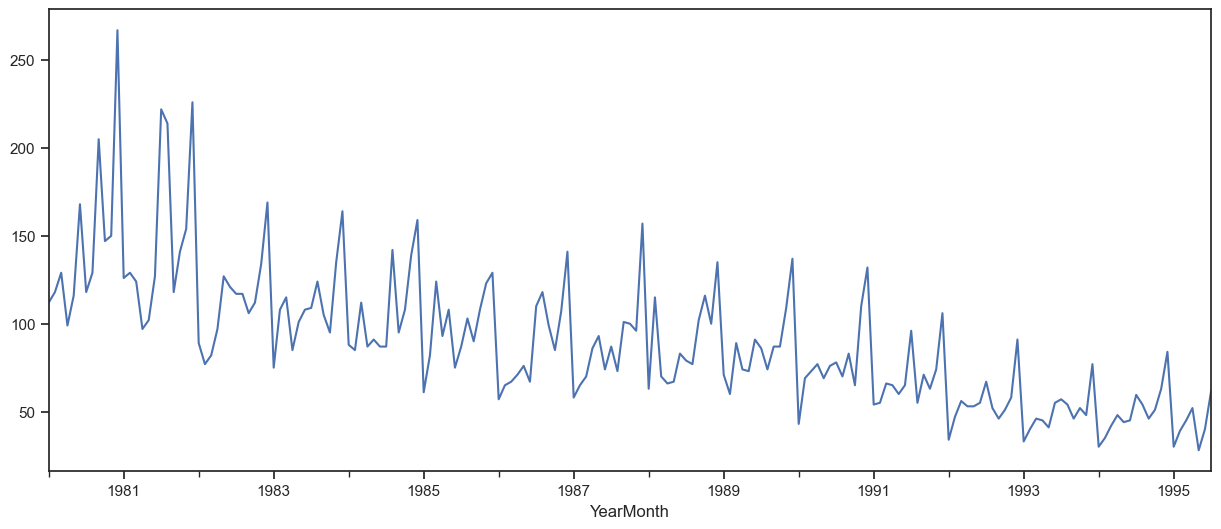

In [314]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

### Yearly Boxplot

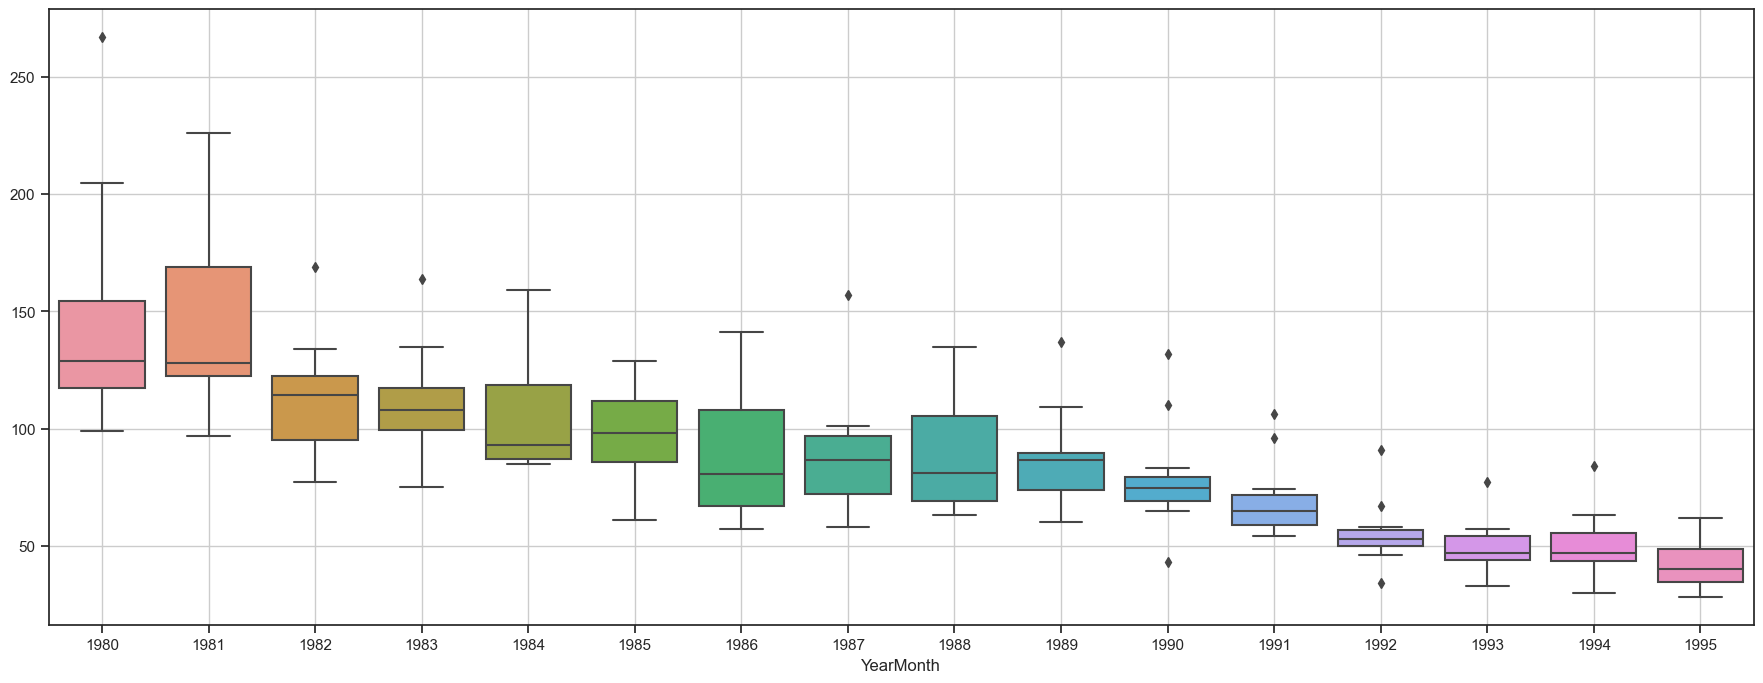

In [316]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,2],ax=ax)
plt.grid();

### Monthly Boxplot

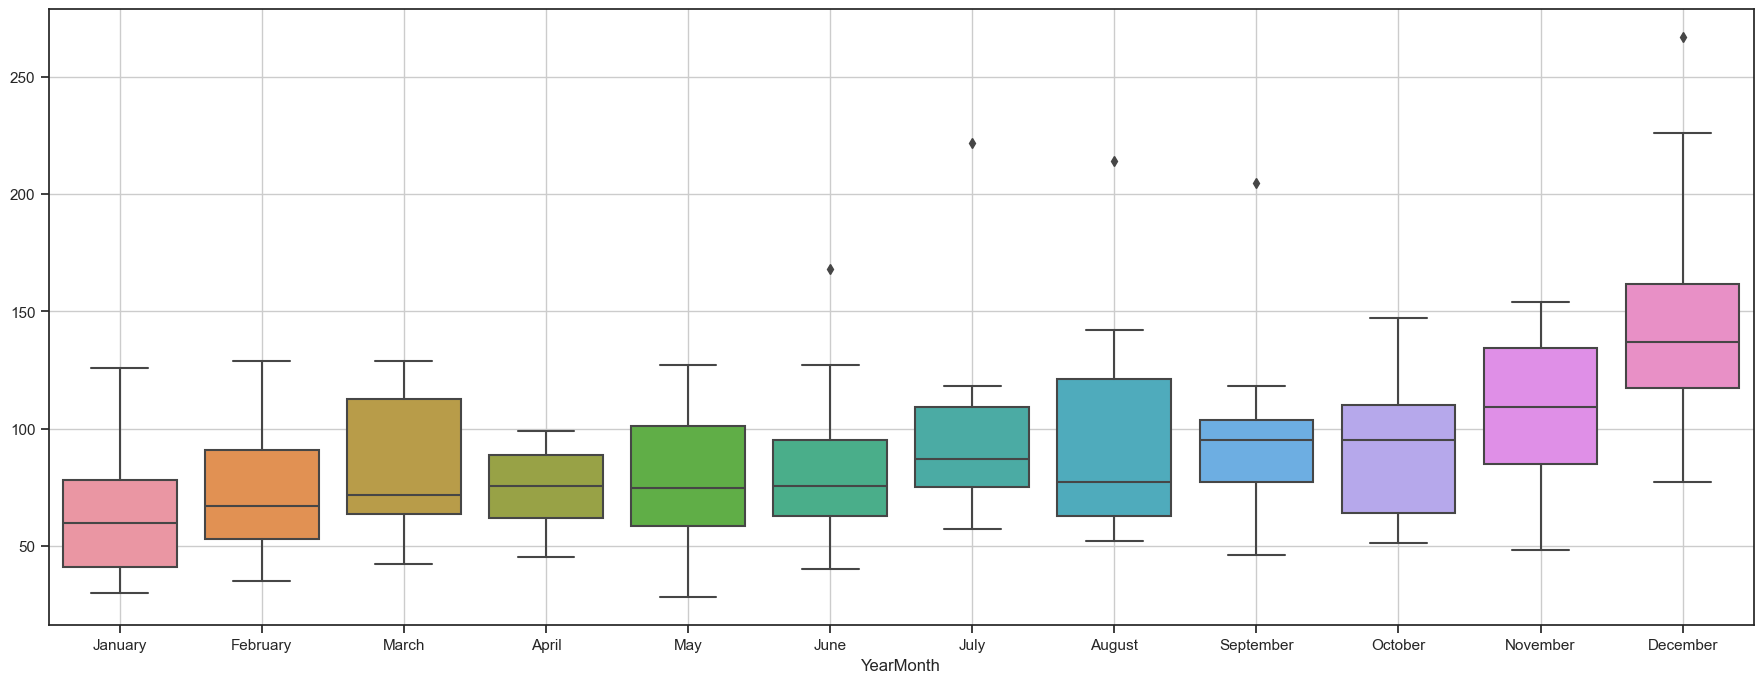

In [318]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Weekly Boxplot

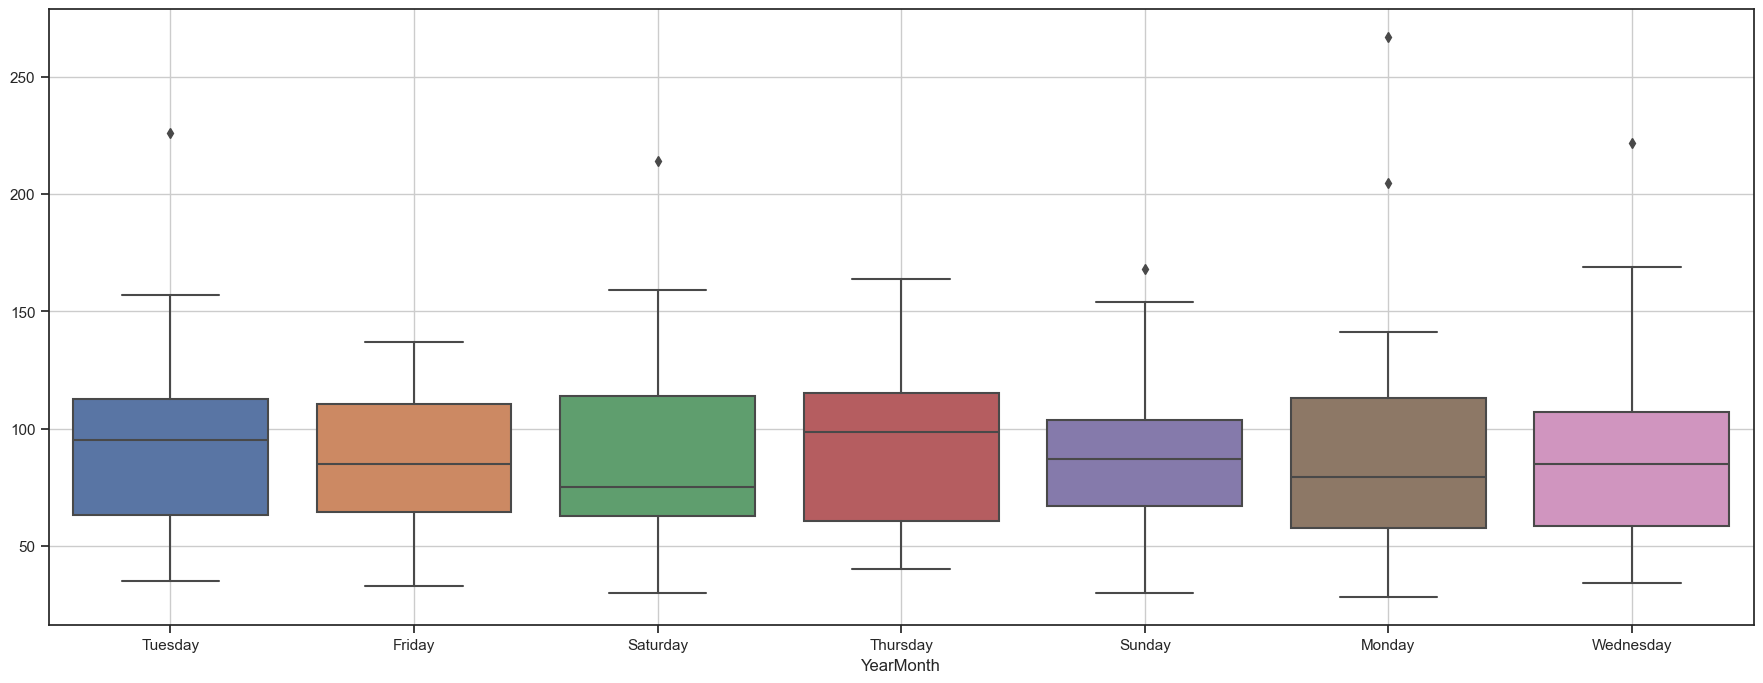

In [320]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Graph of monthly sales across years.

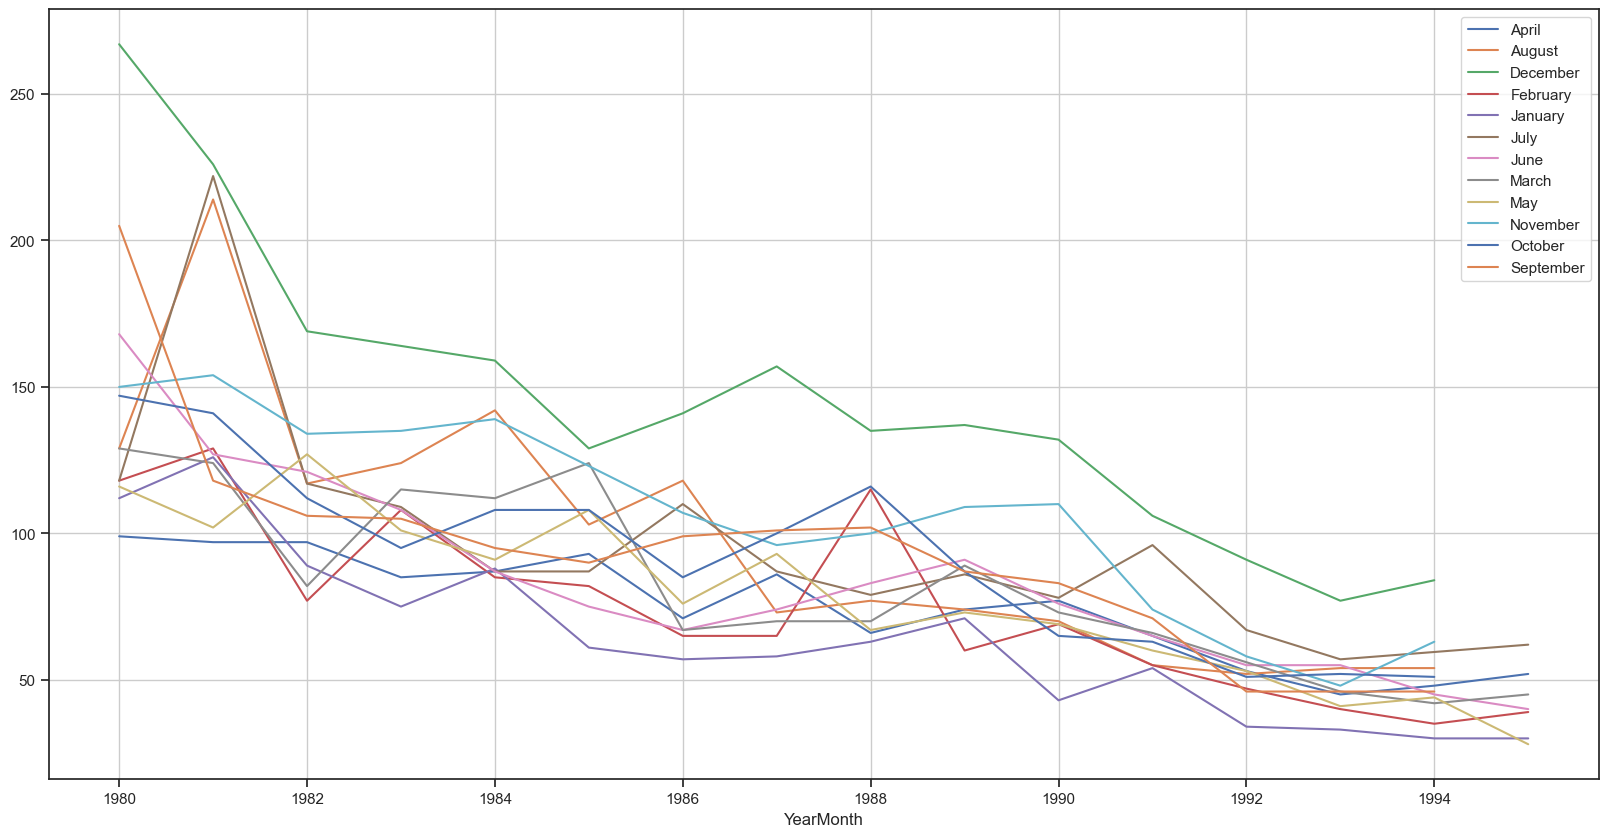

In [322]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Correlation plot

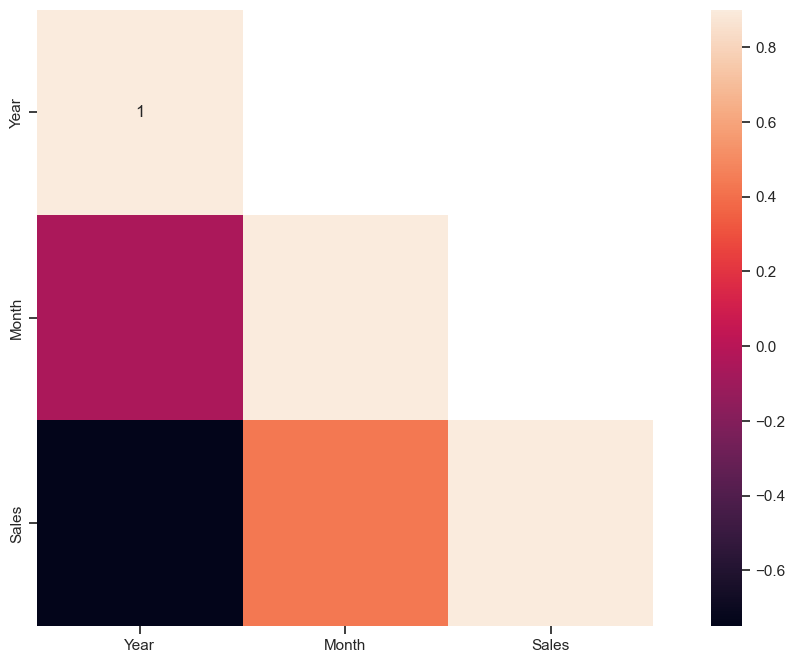

In [324]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

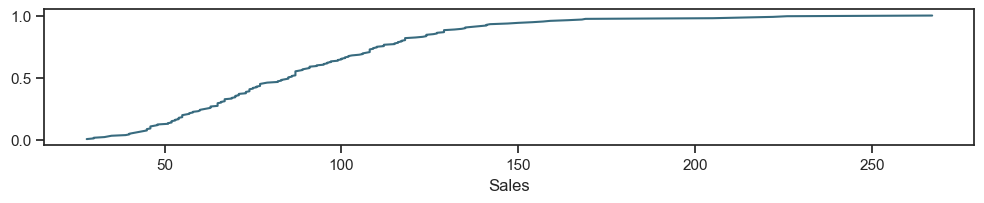

In [326]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition 

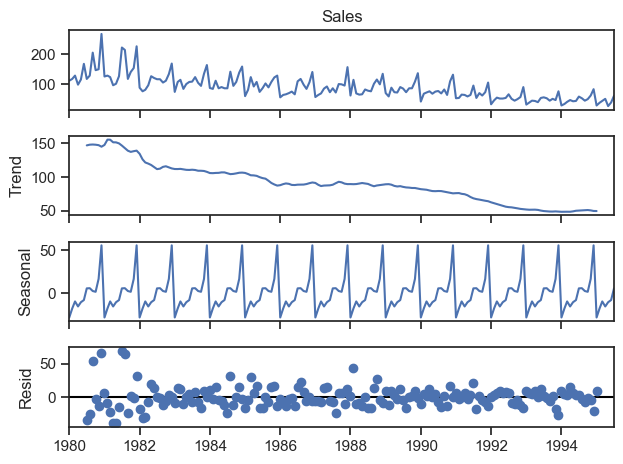

In [328]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [329]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

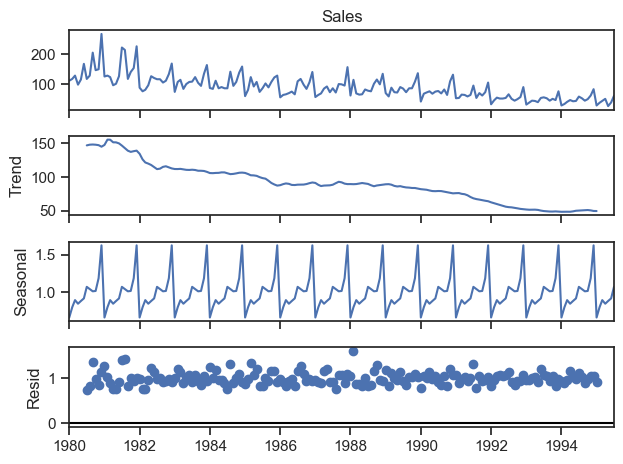

In [330]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [331]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

## 1.3 Splitting the data into training and test. The test data starting in 1991.

In [333]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [334]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

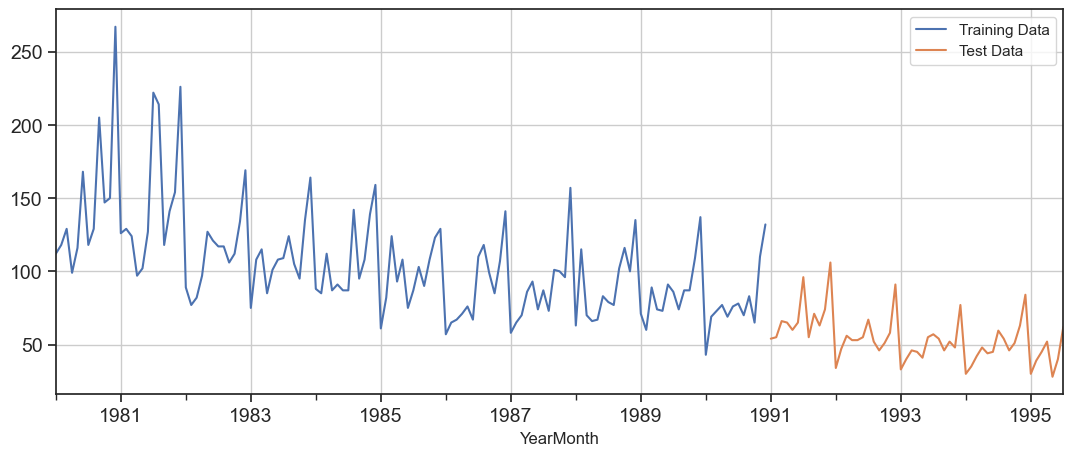

In [335]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Building all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression models and simple average models are also built on the training data and check the performance on the test data using RMSE.

- Model 1:Linear Regression 
- Model 2: Simple Average
- Model 3: Moving Average(MA)
- Model 4: Simple Exponential Smoothing
- Model 5: Double Exponential Smoothing (Holt's Model)
- Model 6: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression

In [339]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [340]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [341]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

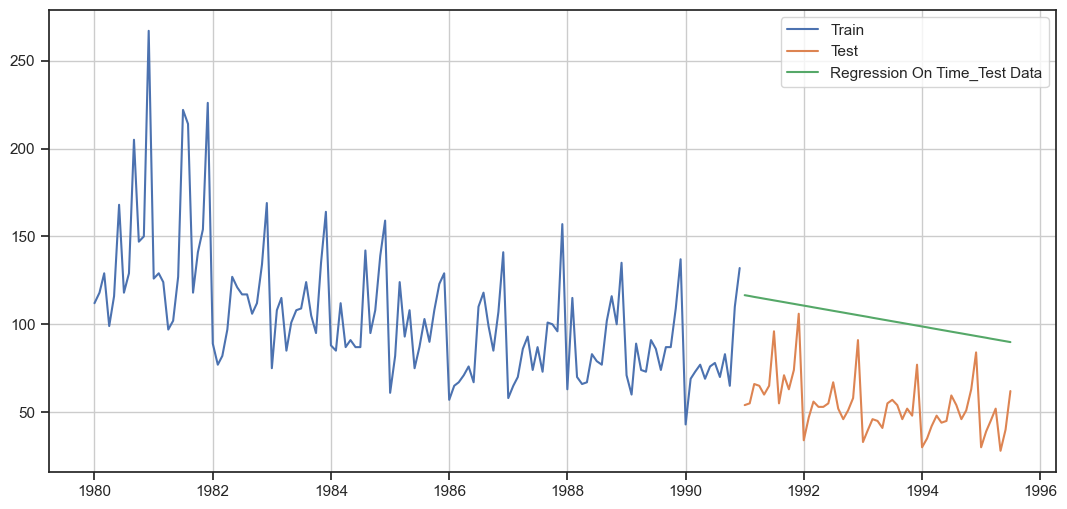

In [342]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [344]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,51.080941


### Method 2: Simple Average

In [346]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [347]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Year,Month,Sales,mean_forecast
YearMonth,,,,
1991-01-01,1991,1,54.0,104.939394
1991-02-01,1991,2,55.0,104.939394
1991-03-01,1991,3,66.0,104.939394
1991-04-01,1991,4,65.0,104.939394
1991-05-01,1991,5,60.0,104.939394


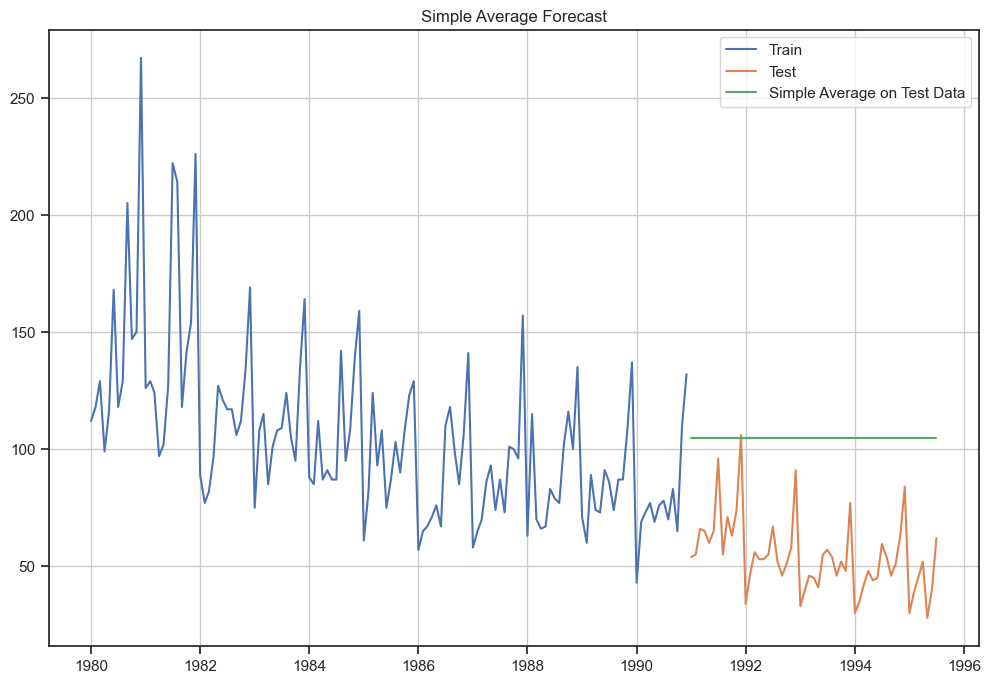

In [348]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [350]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755


### Method 3: Moving Average(MA)

In [352]:
MovingAverage = df.copy()
MovingAverage.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [353]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Year,Month,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1980,1,112.0,NaN,NaN,NaN,NaN
1980-02-01,1980,2,118.0,115.0,NaN,NaN,NaN
1980-03-01,1980,3,129.0,123.5,NaN,NaN,NaN
1980-04-01,1980,4,99.0,114.0,114.5,NaN,NaN
1980-05-01,1980,5,116.0,107.5,115.5,NaN,NaN


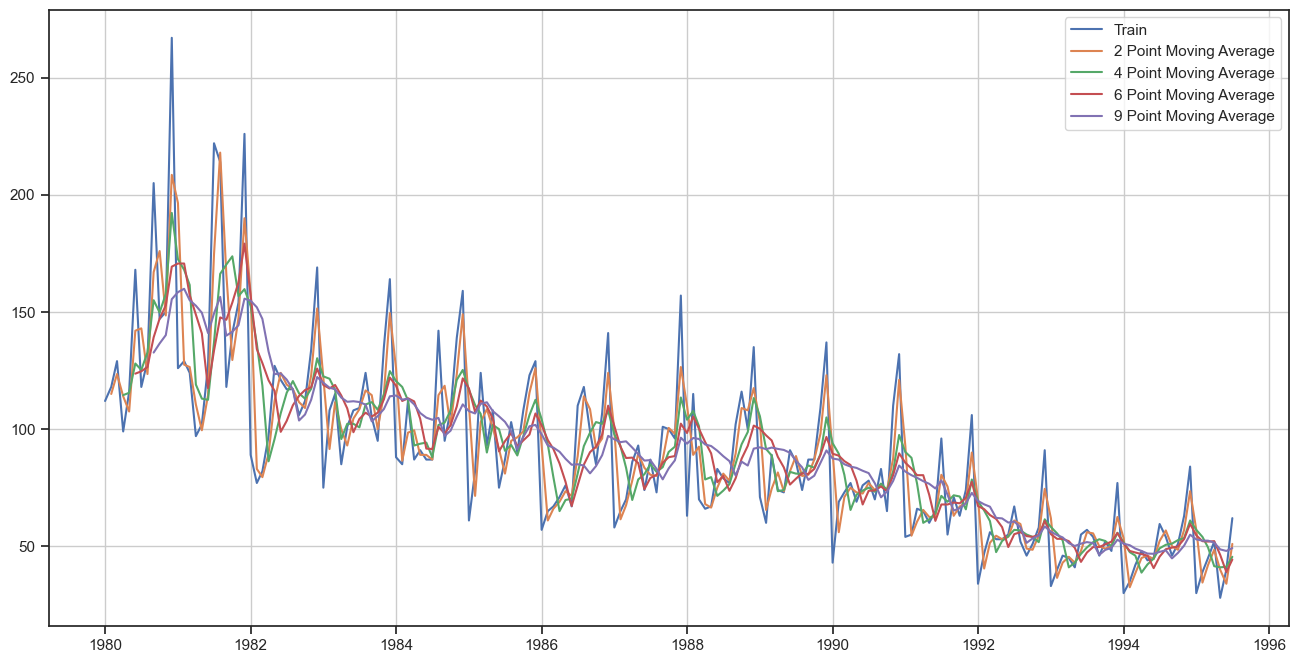

In [354]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [355]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


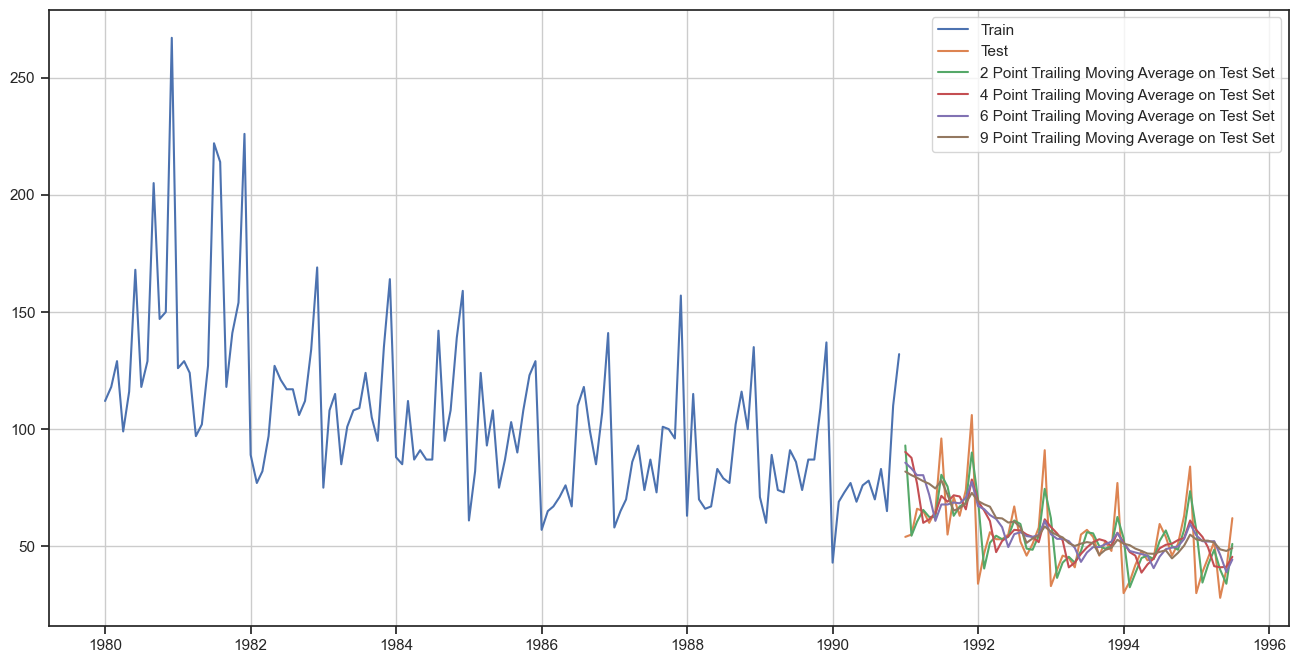

In [356]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [358]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [359]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139


### Method 4: Simple Exponential Smoothing

In [361]:
SES_train = train.copy()
SES_test = test.copy()

In [362]:
SES_train = SES_train.asfreq('MS')
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [363]:
model_SES_autofit = model_SES.fit(optimized=True)

In [364]:
model_SES_autofit.params

{'smoothing_level': 0.12362013660706869,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [365]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [366]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.983766
1991-02-01,1991,2,55.0,87.983766
1991-03-01,1991,3,66.0,87.983766
1991-04-01,1991,4,65.0,87.983766
1991-05-01,1991,5,60.0,87.983766


In [367]:
# Initialize an empty DataFrame
resultsDf_temp = pd.DataFrame({'Alpha Values': [], 'Train RMSE': [], 'Test RMSE': []})

# Iterate over alpha values
for i in np.arange(0.1, 1, 0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'], SES_train[f'predict_{i}'], squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'], SES_test[f'predict_{i}'], squared=False)

    # Append results to DataFrame
    new_row = {'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_model5_test_i}
    resultsDf_temp = pd.concat([resultsDf_temp, pd.DataFrame([new_row])], ignore_index=True)

# Display the final DataFrame
print(resultsDf_temp)

   Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.429535
1           0.2   31.979391  40.957988
2           0.3   32.470164  47.096522
3           0.4   33.035130  53.356493
4           0.5   33.682839  59.229384
5           0.6   34.441171  64.558022
6           0.7   35.323261  69.284383
7           0.8   36.334596  73.359904
8           0.9   37.482782  76.725002


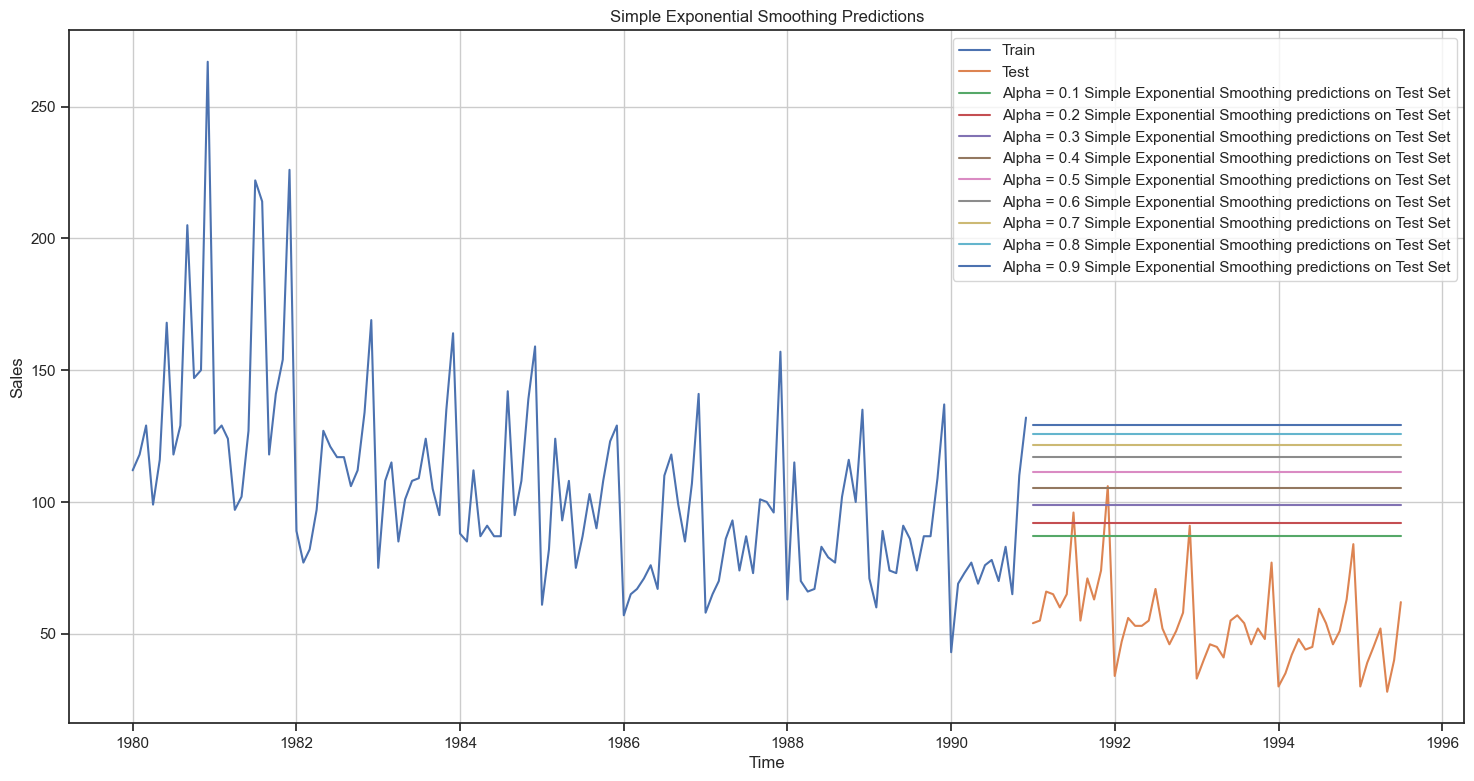

In [368]:
# Plot the actual training and testing sales data
plt.figure(figsize=(18, 9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

# Plot predictions for different alpha values
for i in np.arange(0.1, 1, 0.1):
    column_name = f'predict_{i}'  # Dynamically generated column name
    plt.plot(SES_test[column_name], label=f'Alpha = {i:.1f} Simple Exponential Smoothing predictions on Test Set')

# Add legend and grid for better readability
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Predictions')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid()
plt.show()

#### Model Evaluation

In [370]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.429535
1,0.2,31.979391,40.957988
2,0.3,32.470164,47.096522
3,0.4,33.035130,53.356493
4,0.5,33.682839,59.229384
5,0.6,34.441171,64.558022
6,0.7,35.323261,69.284383
7,0.8,36.334596,73.359904
8,0.9,37.482782,76.725002


In [371]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535


### Method 5: Double Exponential Smoothing (Holt's Model)

In [373]:
DES_train = train.copy()
DES_test = test.copy()

In [374]:
if not isinstance(DES_train.index, pd.DatetimeIndex):
    DES_train.index = pd.to_datetime(DES_train.index)

In [375]:
if DES_train.index.freq is None:
    DES_train = DES_train.asfreq('MS')

In [376]:
model_DES = Holt(DES_train['Sales'])

In [377]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213319620268435,
 'smoothing_trend': 0.13152157897780353,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [378]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.249992
1991-02-01,1991,2,55.0,88.152721
1991-03-01,1991,3,66.0,89.055450
1991-04-01,1991,4,65.0,89.958179
1991-05-01,1991,5,60.0,90.860909


In [379]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [380]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [381]:
results_list = []  # Initialize an empty list to collect results

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        
        # Store predictions
        DES_train[f'predict_{i}_{j}'] = model_DES_alpha_i_j.fittedvalues
        DES_test[f'predict_{i}_{j}'] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Calculate RMSE
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'], DES_train[f'predict_{i}_{j}'], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'], DES_test[f'predict_{i}_{j}'], squared=False)
        
        # Append the result as a dictionary to the list
        results_list.append({'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test})

# Convert the list of dictionaries to a DataFrame
resultsDf_6 = pd.DataFrame(results_list)

resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
2,0.1,0.3,33.145789,77.649847
3,0.1,0.4,33.262191,99.064536
4,0.1,0.5,33.688415,123.742433
...,...,...,...,...
95,1.0,0.6,51.831610,801.137173
96,1.0,0.7,54.497039,841.349112
97,1.0,0.8,57.365879,853.421959
98,1.0,0.9,60.474309,834.167545


Index(['Year', 'Month', 'Sales', 'predict', 'predict_0.1_0.1',
       'predict_0.1_0.2', 'predict_0.1_0.30000000000000004', 'predict_0.1_0.4',
       'predict_0.1_0.5', 'predict_0.1_0.6',
       ...
       'predict_1.0_0.1', 'predict_1.0_0.2', 'predict_1.0_0.30000000000000004',
       'predict_1.0_0.4', 'predict_1.0_0.5', 'predict_1.0_0.6',
       'predict_1.0_0.7000000000000001', 'predict_1.0_0.8', 'predict_1.0_0.9',
       'predict_1.0_1.0'],
      dtype='object', length=104)
            Year  Month  Sales    predict  predict_0.1_0.1  predict_0.1_0.2  \
YearMonth                                                                     
1991-01-01  1991      1   54.0  87.249992        83.866218        81.272870   
1991-02-01  1991      2   55.0  88.152721        83.977090        81.875325   
1991-03-01  1991      3   66.0  89.055450        84.087961        82.477781   
1991-04-01  1991      4   65.0  89.958179        84.198833        83.080236   
1991-05-01  1991      5   60.0  90.860909  

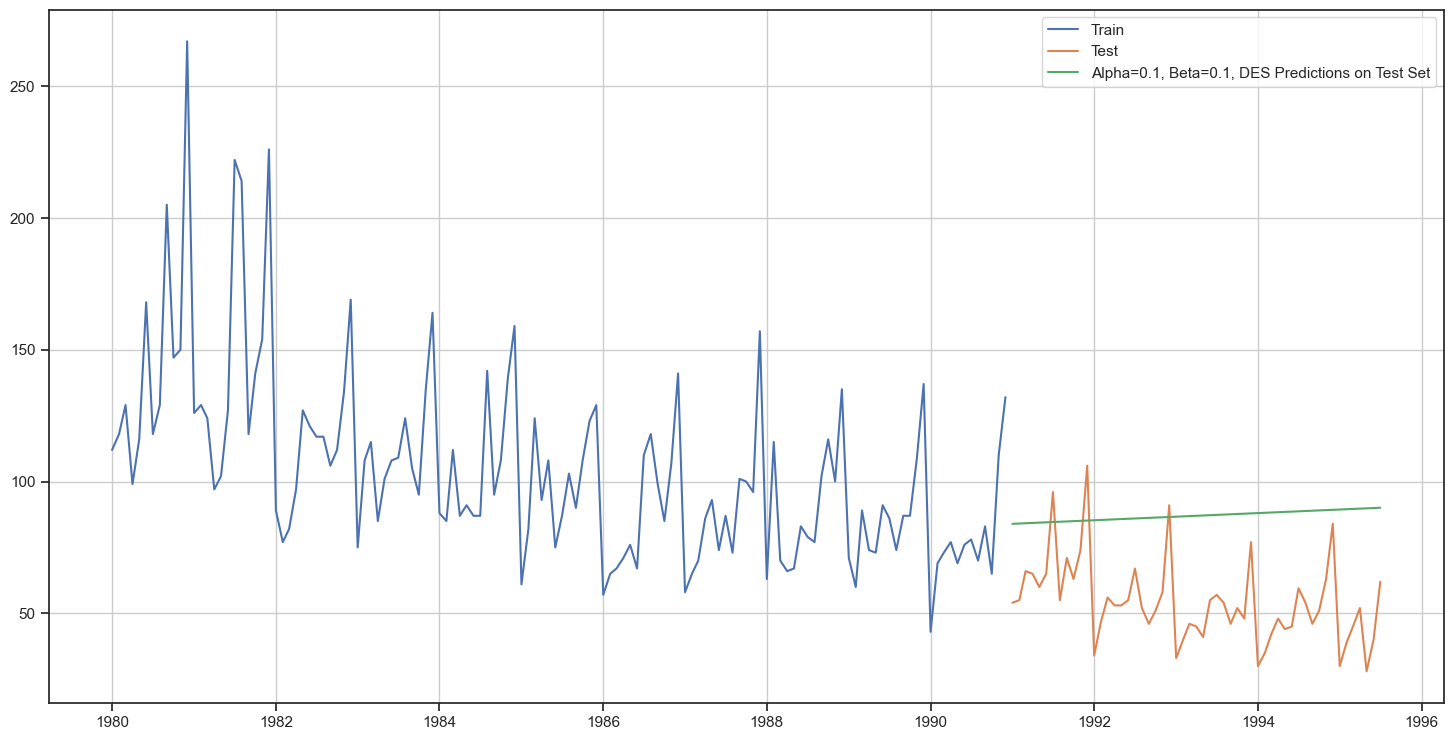

In [382]:
## Plotting on both the Training and Test data
print(DES_test.columns)
print(DES_test.head())

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Double Exponential Smoothing model
model_DES = ExponentialSmoothing(DES_train['Sales'], trend="add").fit(smoothing_level=0.1, smoothing_slope=0.1)

# Generate predictions for the test set
DES_test['predict_0.1_0.1'] = model_DES.forecast(steps=len(DES_test))


print(DES_test.columns)
import matplotlib.pyplot as plt

# Plot training, test, and predictions
plt.figure(figsize=(18, 9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')
plt.plot(DES_test['predict_0.1_0.1'], label='Alpha=0.1, Beta=0.1, DES Predictions on Test Set')

# Finalize the plot
plt.legend(loc='best')
plt.grid()
plt.show()

#### Model Evaluation

In [384]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
10,0.2,0.1,33.097427,65.251675
2,0.1,0.3,33.145789,77.649847
20,0.3,0.1,33.611269,98.152852


In [385]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010


### Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [387]:
TES_train = train.copy()
TES_test = test.copy()

In [388]:
# Ensure the index is a datetime type
TES_train.index = pd.to_datetime(TES_train.index)

# Set the frequency to monthly (or appropriate for your data, e.g., 'D' for daily)
TES_train = TES_train.asfreq('MS')  # 'MS' stands for Month Start

# Define models with the specified trend and seasonality
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'], trend='additive', seasonal='additive', seasonal_periods=12)
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'], trend='additive', seasonal='multiplicative', seasonal_periods=12)
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12)
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'], trend='multiplicative', seasonal='additive', seasonal_periods=12)


In [389]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [390]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [391]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [392]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [393]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [394]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.0521696988178152,
 'smoothing_trend': 0.03546119906270268,
 'smoothing_seasonal': 0.00028476357235519487,
 'damping_trend': nan,
 'initial_level': 165.34400052966296,
 'initial_trend': 0.9923066985722868,
 'initial_seasons': array([0.68749747, 0.77992196, 0.85424762, 0.74551695, 0.83903295,
        0.91333126, 1.00288146, 1.06901269, 1.01412988, 0.99063168,
        1.15690782, 1.59275092]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [395]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.04392379552557389,
 'smoothing_trend': 2.2382727020656378e-05,
 'smoothing_seasonal': 0.0005301252122432588,
 'damping_trend': nan,
 'initial_level': 141.25278376466085,
 'initial_trend': 0.993889634188071,
 'initial_seasons': array([-22.44377304, -10.02696656,  -1.98981311, -12.58528373,
         -3.74636822,   1.74412094,  11.67398645,  17.78894186,
         13.81217532,  11.92521254,  30.01867872,  72.29048742]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [396]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa
YearMonth,,,,
1991-01-01,1991,1,54.0,42.672382
1991-02-01,1991,2,55.0,54.439917
1991-03-01,1991,3,66.0,61.841877
1991-04-01,1991,4,65.0,50.636896
1991-05-01,1991,5,60.0,58.918913


In [397]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1991,1,54.0,42.672382,56.334597
1991-02-01,1991,2,55.0,54.439917,63.692059
1991-03-01,1991,3,66.0,61.841877,69.388935
1991-04-01,1991,4,65.0,50.636896,60.452304
1991-05-01,1991,5,60.0,58.918913,67.770362


In [398]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1991,1,54.0,42.672382,56.334597,55.894208
1991-02-01,1991,2,55.0,54.439917,63.692059,63.236692
1991-03-01,1991,3,66.0,61.841877,69.388935,69.062862
1991-04-01,1991,4,65.0,50.636896,60.452304,60.106162
1991-05-01,1991,5,60.0,58.918913,67.770362,67.444092


In [399]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1991,1,54.0,42.672382,56.334597,55.894208,43.085644
1991-02-01,1991,2,55.0,54.439917,63.692059,63.236692,55.102106
1991-03-01,1991,3,66.0,61.841877,69.388935,69.062862,62.741356
1991-04-01,1991,4,65.0,50.636896,60.452304,60.106162,51.750473
1991-05-01,1991,5,60.0,58.918913,67.770362,67.444092,60.196334


In [400]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.149
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.753
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.307
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.354


In [401]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624


In [402]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [403]:
results_list = []  # Initialize a list to store results

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            TES_train[f'predict_ta_sa_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_ta_sa_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            # Compute RMSE
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[f'predict_ta_sa_{i}_{j}_{k}'], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], 
                TES_test[f'predict_ta_sa_{i}_{j}_{k}']
                .replace(np.inf, 0)
                .replace(np.nan, 0)
                .dropna(), 
                squared=False
            )
            
            # Append results to the list
            results_list.append({
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'ta_sa'
            })

# Convert the list to a DataFrame
resultsDf_7_2 = pd.DataFrame(results_list)


In [404]:
results_list = []  # Initialize a list to store results

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            TES_train[f'predict_ta_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_ta_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            # Compute RMSE
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[f'predict_ta_sm_{i}_{j}_{k}'], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], 
                TES_test[f'predict_ta_sm_{i}_{j}_{k}']
                .replace(np.inf, 0)
                .replace(np.nan, 0)
                .dropna(), 
                squared=False
            )
        
            # Append the result as a dictionary to the list
            results_list.append({
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'ta_sm'
            })

# Convert the list to a DataFrame after the loop
resultsDf_7_2 = pd.DataFrame(results_list)


In [405]:
results_list = []  # Initialize a list to store results

for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        for k in np.arange(0.1, 1.0, 0.1):
            # Fit the model
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(
                smoothing_level=i, 
                smoothing_slope=j, 
                smoothing_seasonal=k, 
                optimized=False, 
                use_brute=True
            )
            
            # Add predictions to train and test
            TES_train[f'predict_tm_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_tm_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            # Calculate RMSE for train and test
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], 
                TES_train[f'predict_tm_sm_{i}_{j}_{k}'], 
                squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], 
                TES_test[f'predict_tm_sm_{i}_{j}_{k}']
                .replace(np.inf, 0)
                .replace(np.nan, 0)
                .dropna(), 
                squared=False
            )
            
            # Add the result to the list
            results_list.append({
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'tm_sm'
            })

# Convert the list to a DataFrame
resultsDf_7_2 = pd.DataFrame(results_list)


In [406]:
# Initialize a list to store results
results_list = []

for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        for k in np.arange(0.1, 1.0, 0.1):
            # Fit the Triple Exponential Smoothing model
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            
            # Generate predictions
            TES_train[f'predict_tm_sa_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_tm_sa_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            # Calculate RMSE for train and test datasets
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[f'predict_tm_sa_{i}_{j}_{k}'], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], 
                TES_test[f'predict_tm_sa_{i}_{j}_{k}']
                .replace(np.inf, 0)
                .replace(np.nan, 0)
                .dropna(), 
                squared=False
            )
            
            # Append results as a dictionary to the list
            results_list.append({
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'tm_sa'
            })

# Convert the list of results into a DataFrame
resultsDf_7_2 = pd.DataFrame(results_list)


In [407]:
TES_test.head()

,Year,Month,Sales,predict_ta_sa_0.1_0.1_0.1,predict_ta_sa_0.1_0.1_0.2,predict_ta_sa_0.1_0.1_0.30000000000000004,predict_ta_sa_0.1_0.1_0.4,predict_ta_sa_0.1_0.1_0.5,predict_ta_sa_0.1_0.1_0.6,predict_ta_sa_0.1_0.1_0.7000000000000001,...,predict_tm_sa_0.9_0.8_0.9,predict_tm_sa_0.9_0.9_0.1,predict_tm_sa_0.9_0.9_0.2,predict_tm_sa_0.9_0.9_0.30000000000000004,predict_tm_sa_0.9_0.9_0.4,predict_tm_sa_0.9_0.9_0.5,predict_tm_sa_0.9_0.9_0.6,predict_tm_sa_0.9_0.9_0.7000000000000001,predict_tm_sa_0.9_0.9_0.8,predict_tm_sa_0.9_0.9_0.9
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,54.0,45.711834,46.537302,46.559436,46.071952,45.225493,44.012323,42.371394,...,3.735952e+33,49.121533,76.518424,376.731488,4895.861548,5.809412e+04,1.638740e+05,-5.749099e+08,-1.981676e+12,9.552794e+39
1991-02-01,1991,2,55.0,56.369270,60.659980,62.645947,63.356292,63.447907,63.255359,62.959944,...,7.148786e+32,37.090349,76.114781,509.316662,16304.896188,6.511844e+05,2.092803e+07,-2.812972e+11,-1.592913e+17,7.303099e+38
1991-03-01,1991,3,66.0,63.004762,65.794341,66.979401,67.649481,68.330584,69.025477,69.443834,...,1.357303e+32,15.196663,47.008485,593.068850,47658.505261,5.673444e+06,8.764094e+08,-2.321151e+11,-4.477184e+20,5.583209e+37
1991-04-01,1991,4,65.0,51.663022,58.369250,62.190538,64.397061,65.989684,67.481555,68.978770,...,2.576482e+31,-2.515265,9.602428,669.057836,138695.857310,4.866318e+07,2.483195e+10,1.937298e+15,-8.742387e+22,4.268341e+36
1991-05-01,1991,5,60.0,58.931424,61.246579,62.077338,62.127541,62.025325,62.111373,62.439476,...,-1.230813e+29,-1.476818,-5.631953,759.079023,403820.871296,4.173403e+08,6.957411e+11,4.618220e+17,-2.928919e+24,-3.966771e+36


#### Model Evaluation

In [409]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
64,0.1,0.8,0.2,23.635989,12.111140,tm_sa
37,0.1,0.5,0.2,22.408154,12.182355,tm_sa
55,0.1,0.7,0.2,23.272614,12.215182,tm_sa
28,0.1,0.4,0.2,21.982924,12.228441,tm_sa
10,0.1,0.2,0.2,21.514299,12.388162,tm_sa


In [410]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140


In [411]:
for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        for k in np.arange(0.1, 1.0, 0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(
                smoothing_level=i, 
                smoothing_slope=j, 
                smoothing_seasonal=k, 
                optimized=False, 
                use_brute=True
            )
            # Create dynamic column name for predictions
            column_name = f'predict_tm_sm_{i:.1f}_{j:.1f}_{k:.1f}'
            
            # Store predictions in the test DataFrame
            TES_test[column_name] = model_TES_alpha_i_j_k.forecast(steps=len(test))


In [412]:
print(TES_test.columns)


Index(['Year', 'Month', 'Sales', 'predict_ta_sa_0.1_0.1_0.1',
       'predict_ta_sa_0.1_0.1_0.2',
       'predict_ta_sa_0.1_0.1_0.30000000000000004',
       'predict_ta_sa_0.1_0.1_0.4', 'predict_ta_sa_0.1_0.1_0.5',
       'predict_ta_sa_0.1_0.1_0.6', 'predict_ta_sa_0.1_0.1_0.7000000000000001',
       ...
       'predict_tm_sm_0.9_0.7_0.4', 'predict_tm_sm_0.9_0.7_0.5',
       'predict_tm_sm_0.9_0.7_0.6', 'predict_tm_sm_0.9_0.7_0.7',
       'predict_tm_sm_0.9_0.7_0.8', 'predict_tm_sm_0.9_0.7_0.9',
       'predict_tm_sm_0.9_0.8_0.3', 'predict_tm_sm_0.9_0.8_0.7',
       'predict_tm_sm_0.9_0.9_0.3', 'predict_tm_sm_0.9_0.9_0.7'],
      dtype='object', length=3847)


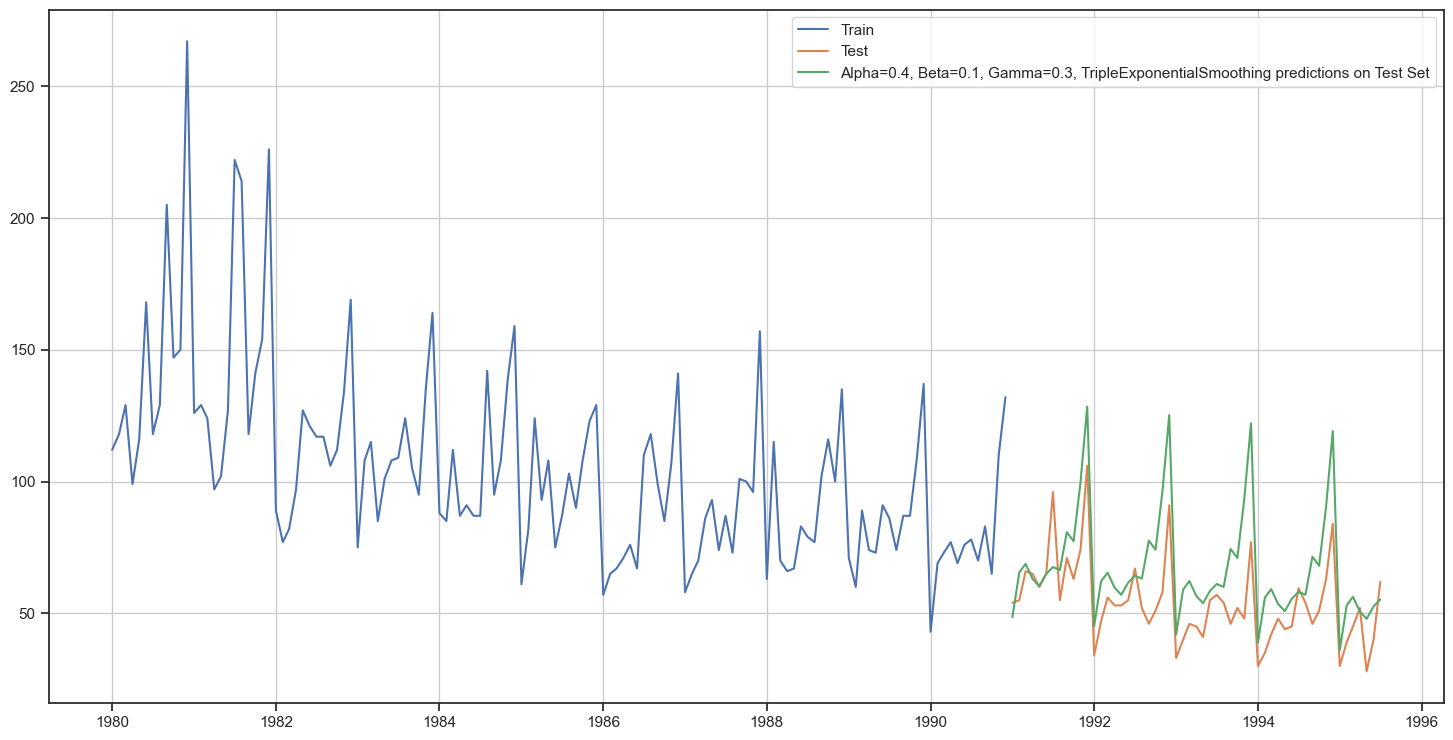

In [413]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

column_name = 'predict_tm_sm_0.4_0.1_0.3'
if column_name in TES_test.columns:
    plt.plot(TES_test[column_name], label='Alpha=0.4, Beta=0.1, Gamma=0.3, TripleExponentialSmoothing predictions on Test Set')
else:
    print(f"Column '{column_name}' not found. Check your loop for naming issues.")

plt.legend(loc='best')
plt.grid()
plt.show()


## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Checking for stationarity of the whole Time Series data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.
 
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.
 
We see that at 5% significant level the Time Series is non-stationary.

In [417]:
from statsmodels.tsa.stattools import adfuller

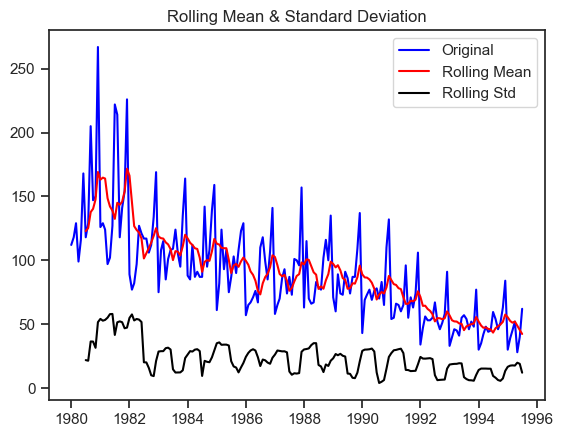

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [418]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

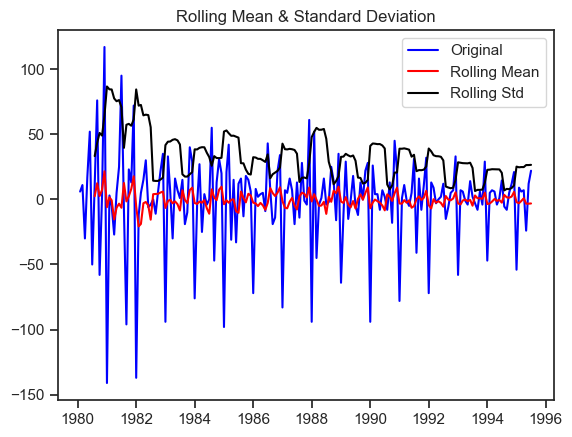

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [419]:
test_stationarity(df['Sales'].diff().dropna())

## 1.6 Building an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluated this model on the test data using RMSE.

### Auto - Arima Model  

In [422]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [423]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [424]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty list to collect results
results = []

for param in pdq:
    # Fit the ARIMA model
    ARIMA_model = ARIMA(train['Sales'].values, order=param).fit()
    # Print AIC value
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    # Collect results in a list of dictionaries
    results.append({'param': param, 'AIC': ARIMA_model.aic})

# Convert the list of dictionaries to a DataFrame
ARIMA_AIC = pd.DataFrame(results)

# Display the DataFrame
print(ARIMA_AIC)


ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223309993
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.5078621868597
ARIMA(2, 1, 2) - AIC:1281.8707222264168
ARIMA(2, 1, 3) - AIC:1274.6956920197993
ARIMA(3, 1, 0) - AIC:1297.4810917271707
ARIMA(3, 1, 1) - AIC:1282.4192776272025
ARIMA(3, 1, 2) - AIC:1283.720740597717
ARIMA(3, 1, 3) - AIC:1278.6543716254587
        param          AIC
0   (0, 1, 0)  1333.154673
1   (0, 1, 1)  1282.309832
2   (0, 1, 2)  1279.671529
3   (0, 1, 3)  1280.545376
4   (1, 1, 0)  1317.350311
5   (1, 1, 1)  1280.574230
6   (1, 1, 2)  1279.870723
7   (1, 1, 3)  1281.870722
8   (2, 1, 0)  1298.611034
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
11  (2, 1, 3)  1274.695692
12  (3, 1, 

In [425]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695692
15,"(3, 1, 3)",1278.654372
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [426]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 08 Dec 2024   AIC                           1274.696
Time:                        22:16:22   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.706
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6778      0.084    -20.027      0.000      -1.842      -1.514
ar.L2         -0.7286      0.084     -8.698      0.000      -0.893      -0.564
ma.L1          1.0444      0.602      1.734      0.0

### Predict on the Test Set using this model and evaluate the model.

In [428]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.41531367205513


In [429]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140


## AUTO- SARIMA

In [431]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [432]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [433]:
import pandas as pd
import statsmodels.api as sm

# Initialize an empty DataFrame
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

# Iterate over parameter combinations
for param in pdq:
    for param_seasonal in model_pdq:
        # Define SARIMA model
        SARIMA_model = sm.tsa.statespace.SARIMAX(
            train['Sales'].values,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        
        # Fit the model
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        # Print AIC for the current combination
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        
        # Create a new row as a DataFrame
        new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
        
        # Concatenate the new row to the SARIMA_AIC DataFrame
        SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)

# Display the final DataFrame
print(SARIMA_AIC)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380875
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3122.094709929814
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386566
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749974
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4600.377507188015
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697538
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945756
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3521.295618942269
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931053
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702789318
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128389
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3545.166222344632
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918327
SARIMA(0, 1, 1)x(0, 0, 

In [434]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880938
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [435]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 08 Dec 2024   AIC                            774.400
Time:                                         22:24:14   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

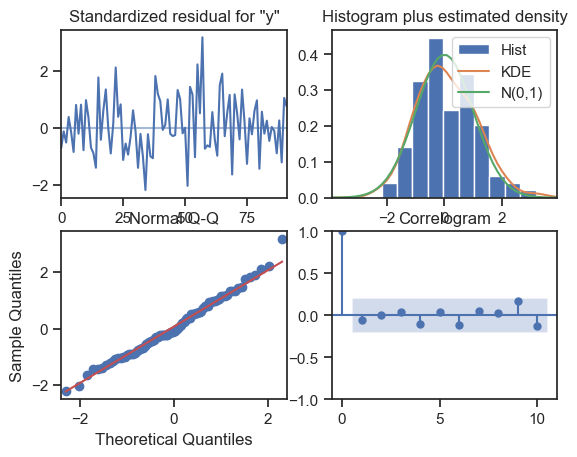

In [436]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [438]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.234397,13.906781,27.977606,82.491188
1,68.122440,13.990191,40.702169,95.542711
2,67.908290,14.011219,40.446806,95.369775
3,66.785501,14.098543,39.152865,94.418138
4,69.760573,14.107902,42.109593,97.411553


In [439]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.534956002841717


In [440]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140


## 1.7 Building ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluating this model on the test data using RMSE.

#### Model 10 : Manual ARIMA

In [443]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

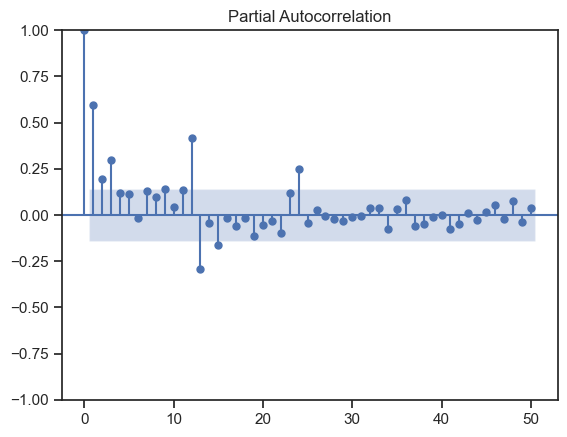

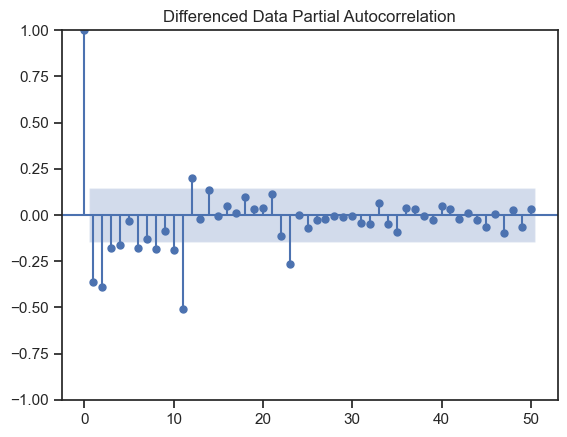

In [444]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

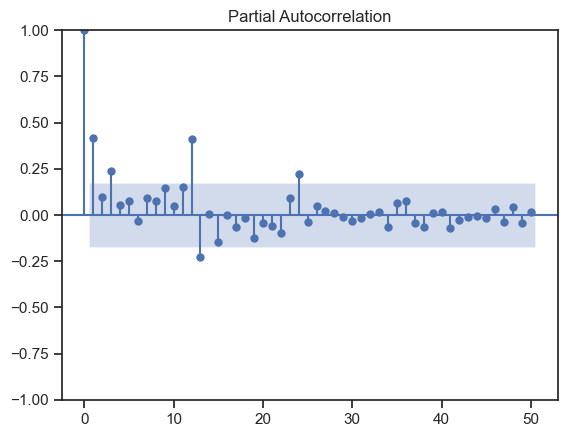

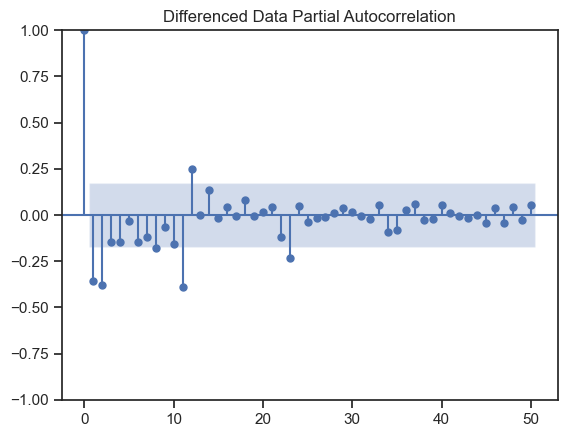

In [445]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [446]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 08 Dec 2024   AIC                           1281.871
Time:                        22:24:18   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

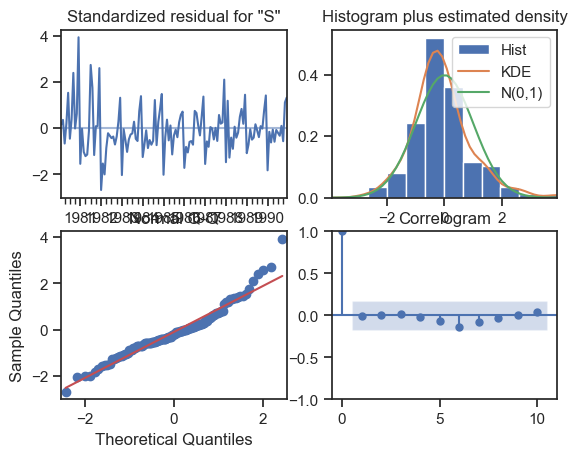

In [447]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation 

In [449]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.473224886646065


In [450]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140


#### Model 11 : Manual SARIMA

In [452]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [453]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sun, 08 Dec 2024   AIC                           1094.031
Time:                                    22:24:23   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5493      0.228     -2.410      0.016      -0.996      -0.103
ar.L2         -0.0744      0.099   

In [454]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_manual_SARIMA.aic]})

# Concatenate the new row to the existing DataFrame
SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)

# Display the updated DataFrame
SARIMA_AIC


,param,seasonal,AIC
0,"(3, 1, 3)","(3, 0, 3, 12)",1094.031391


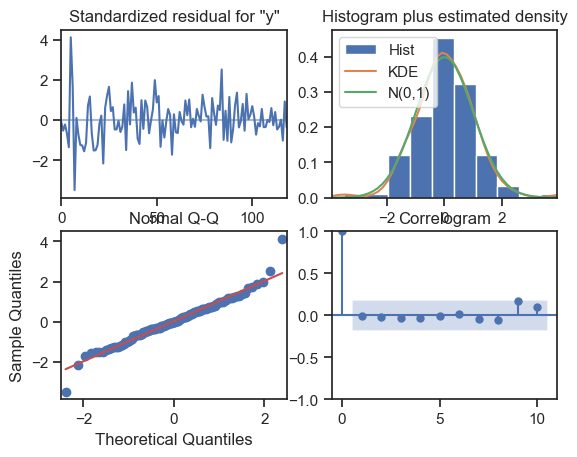

In [611]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [455]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,38.866127,21.080237,-2.450379,80.182633
1,65.281683,21.893762,22.370698,108.192669
2,60.208578,21.939717,17.207522,103.209634
3,59.303133,22.254170,15.685762,102.920504
4,60.595523,22.300415,16.887512,104.303533


In [456]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.977176657568455


In [457]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192624
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140


## 1.8 Building a table (creating a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [459]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
2pointTrailingMovingAverage,11.589082
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",12.111140
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"(2,1,2)(2,1,2,12),Manual_SARIMA",14.977177
"(3,1,1),(3,0,2,12),Auto_SARIMA",18.534956
Auto_ARIMA,36.415314
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"ARIMA(3,1,3)",36.473225


## 1.9 Based on the model-building, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals.

In [461]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [462]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [463]:
# prediction
TES_train = df.copy()

In [464]:
# Ensure the index is a DatetimeIndex with a defined frequency
TES_train.index = pd.date_range(start=TES_train.index[0], periods=len(TES_train), freq='MS')

# Create the model
model_TES_tm_sm = ExponentialSmoothing(
    TES_train['Sales'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12
)

# Define smoothing parameters
alpha = 0.4
beta = 0.1
gamma = 0.3

# Fit the model
model_TES = model_TES_tm_sm.fit(
    smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, optimized=False, use_brute=True
)

# Forecast future values
prediction = model_TES.forecast(steps=12)

# Display predictions
print(prediction)


1995-08-01    44.510965
1995-09-01    41.726134
1995-10-01    45.505262
1995-11-01    53.516557
1995-12-01    76.944425
1996-01-01    28.806916
1996-02-01    36.473494
1996-03-01    42.771692
1996-04-01    45.418290
1996-05-01    35.490857
1996-06-01    43.504695
1996-07-01    51.516141
Freq: MS, dtype: float64


In [465]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,44.510965
1995-09-01,41.726134
1995-10-01,45.505262
1995-11-01,53.516557
1995-12-01,76.944425
1996-01-01,28.806916
1996-02-01,36.473494
1996-03-01,42.771692
1996-04-01,45.418290
1996-05-01,35.490857


In [466]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,5.303162,44.510965,83.718767
1995-09-01,2.518332,41.726134,80.933937
1995-10-01,6.297460,45.505262,84.713065
1995-11-01,14.308754,53.516557,92.724359
1995-12-01,37.736623,76.944425,116.152227


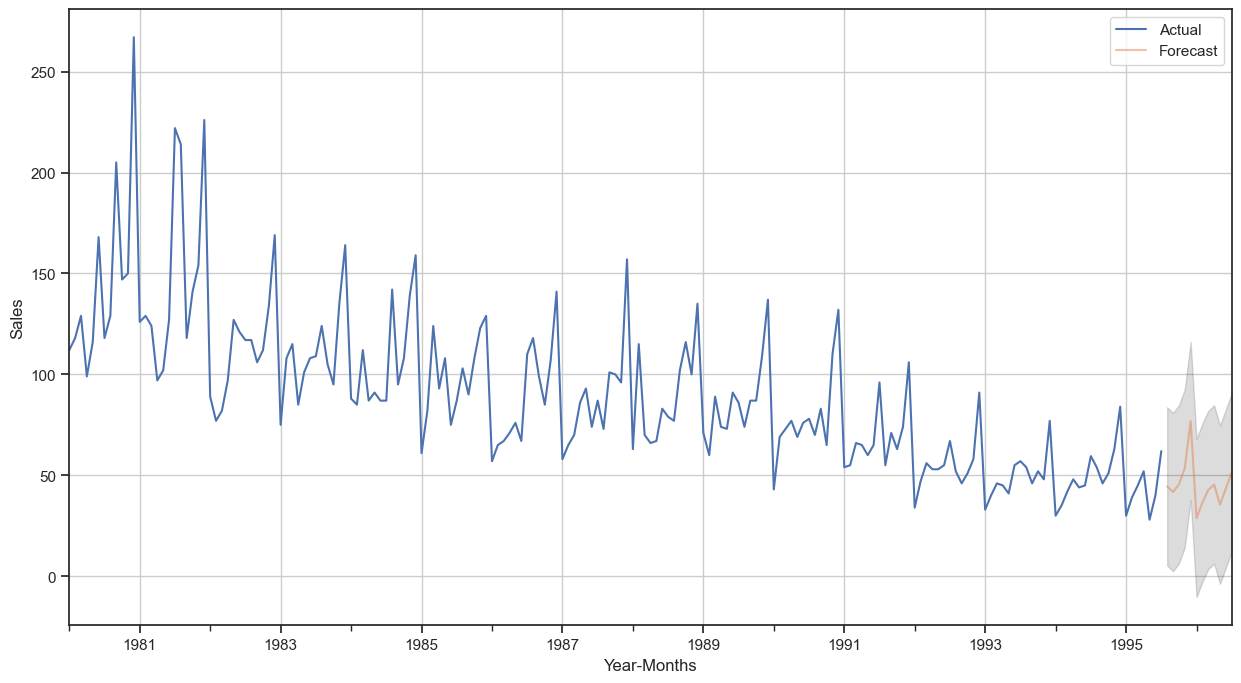

In [467]:
# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()